# Clustering Documents

Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use('ggplot')

Load in data

In [2]:
articles_df = pd.read_pickle("articles.pkl")
articles_df.head()

,document_type,web_url,lead_paragraph,abstract,snippet,news_desk,word_count,source,section_name,subsection_name,_id,pub_date,print_page,headline,content
0,article,http://www.nytimes.com/2013/10/03/sports/footb...,You would think that in a symmetric zero-sum s...,None,You would think that in a symmetric zero-sum s...,Sports,347,The New York Times,Sports,Pro Football,524d4e3a38f0d8198974001f,2013-10-03T00:00:00Z,None,Week 5 Probabilities: Why Offense Is More Impo...,the original goal building model football fore...
1,article,http://www.nytimes.com/2013/10/03/us/new-immig...,House Democrats on Wednesday unveiled an immig...,House Democrats unveil immigration bill that p...,House Democrats on Wednesday unveiled an immig...,National,83,The New York Times,U.S.,None,524cf71338f0d8198973ff7b,2013-10-03T00:00:00Z,21,New Immigration Bill Put Forward,house unveiled immigration bill provides path ...
2,article,http://www.nytimes.com/2013/10/03/us/arizona-j...,A federal judge on Wednesday ordered the appoi...,Federal Judge Murray Snow orders the appointme...,A federal judge on Wednesday ordered the appoi...,National,160,The New York Times,U.S.,None,524cf50e38f0d8198973ff79,2013-10-03T00:00:00Z,21,Arizona: Judge Orders Monitor to Oversee Maric...,federal judge wednesday ordered appointment in...
3,article,http://www.nytimes.com/2013/10/03/us/texas-sta...,Texas has turned to a compounding pharmacy to ...,"Documents show that Texas, nation's most activ...",Texas has turned to a compounding pharmacy to ...,National,112,The New York Times,U.S.,None,524cf39a38f0d8198973ff78,2013-10-03T00:00:00Z,21,Texas: State Bought Execution Drugs From a Com...,texas nation’s active death-penalty state turn...
4,article,http://www.nytimes.com/2013/10/03/sports/tenni...,"Rafael Nadal, aiming to end Novak Djokovic’s r...",None,"Rafael Nadal, aiming to end Novak Djokovic’s r...",Sports,49,The New York Times,Sports,Tennis,524cf28b38f0d8198973ff73,2013-10-03T00:00:00Z,14,Nadal on Track for No. 1 Spot,rafael nadal aiming end novak djokovic’s run 1...


Vectorize the article content as tf-idf

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(articles_df['content'])
features = vectorizer.get_feature_names()

Apply k-means clustering to the vectors

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans()

kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Inspect the centroids

In [5]:
print("cluster centers:")
print(kmeans.cluster_centers_)

cluster centers:
[[0.         0.00125823 0.         ... 0.         0.         0.        ]
 [0.         0.00545611 0.00092919 ... 0.00054296 0.         0.        ]
 [0.         0.01143597 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.01262278 0.         ... 0.         0.00072674 0.        ]
 [0.         0.00901974 0.         ... 0.00034957 0.00046108 0.        ]
 [0.00084226 0.00409382 0.         ... 0.         0.         0.        ]]


Find the top 10 features for each cluster

In [6]:
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
print("top features for each cluster:")
for num, centroid in enumerate(top_centroids):
    print("%d: %s" % (num, ", ".join(features[i] for i in centroid)))

top features for each cluster:
0: iran, rouhani, iranian, nuclear, mr, obama, israel, united, netanyahu, president
1: art, mr, music, ms, opera, work, museum, dance, song, new
2: yankee, rivera, pettitte, game, season, girardi, jeter, inning, cano, said
3: said, mr, year, new, state, company, people, court, government, percent
4: cup, race, team, oracle, club, victory, zealand, match, second, scored
5: attack, said, syria, killed, chemical, official, weapon, syrian, security, government
6: republican, government, party, house, health, mr, shutdown, care, percent, senate
7: game, season, team, said, yard, player, league, touchdown, coach, play


Limit the number of features and see if the words of the topics change

In [7]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(articles_df['content'])
features = vectorizer.get_feature_names()
kmeans = KMeans()
kmeans.fit(X)
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
print("top features for each cluster with 1000 max features:")
for num, centroid in enumerate(top_centroids):
    print("%d: %s" % (num, ", ".join(features[i] for i in centroid)))

top features for each cluster with 1000 max features:
0: sept, cup, new, race, team, year, world, said, series, editor
1: game, season, team, said, player, league, yankee, yard, play, coach
2: iran, rouhani, iranian, nuclear, mr, obama, israel, united, president, netanyahu
3: mr, music, art, ms, work, song, dance, new, like, opera
4: republican, health, house, care, government, senate, obama, law, mr, shutdown
5: attack, said, syria, killed, official, weapon, syrian, chemical, shabab, security
6: mr, said, court, party, government, state, judge, case, year, political
7: said, company, percent, year, new, bank, china, government, million, market


Print out the titles of a random sample of the articles assigned to each cluster to get a sense of the topic

In [8]:
assigned_cluster = kmeans.transform(X).argmin(axis=1)
for i in range(kmeans.n_clusters):
    cluster = np.arange(0, X.shape[0])[assigned_cluster==i]
    sample_articles = np.random.choice(cluster, 3, replace=False)
    print("cluster %d:" % i)
    for article in sample_articles:
        print("    %s" % articles_df.loc[article]['headline'])

cluster 0:
    Noncitizens on Juries?
    Invitation to a Dialogue: Viewing Violent Media
    Swimmer Is Fighting a Ruling: She Is Not Disabled Enough
cluster 1:
    Wild-Card Race Tightens as Rays Lose to Blue Jays
    Olympics Loom Large Over N.H.L. 
    Neymar Scores as Barcelona Stays Perfect in League Play
cluster 2:
    Israeli Leader Excoriates New President of Iran
    Enigmatic Leader of Iran Backs Overture, for Now
    As It Makes Overtures to Iran, U.S. Strives to Reassure Israel
cluster 3:
    Backstage Drama at the Met, Worthy of Opera
    A Jazzman Swinging to Rhapsody and Back
    Experimenting Begins as the Music Starts to Play
cluster 4:
    Kamikaze Congress
    Excuses, Excuses, Excuses
    Obama and Clintons Share Stage for Health Care Talk
cluster 5:
    Iraq: Bombings Kill at Least 55
    Attention Switches to Investigation of Kenyan Mall Siege
    In Virginia, a Deal for a Man Accused of Aiding Syrian Rebels
cluster 6:
    What’s on Tuesday
    For Journalists, M

Assign clusters

In [9]:
from collections import Counter
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)
assigned_cluster = kmeans.transform(X).argmin(axis=1)
print("top 2 topics for each cluster")
for i in range(kmeans.n_clusters):
    cluster = np.arange(0, X.shape[0])[assigned_cluster==i]
    topics = articles_df.loc[cluster].dropna()['section_name']
    most_common = Counter(topics).most_common()
    if len(most_common) > 1:
        print("Cluster %d: %s" % (i, most_common[0][0]),", %s" % (most_common[1][0]))

top 2 topics for each cluster
Cluster 0: Business Day , World
Cluster 1: Arts , Business Day
Cluster 3: Sports , Opinion
Cluster 4: U.S. , Business Day
Cluster 5: World , Opinion
Cluster 6: World , Business Day
Cluster 7: World , Opinion
Cluster 8: Sports , World
Cluster 9: Business Day , Arts


Try clustering with a subset of the sections

In [10]:
cond_sports = articles_df['section_name']=='Sports'
cond_arts = articles_df['section_name']=='Arts'
cond_business_day = articles_df['section_name']=='Business Day'

In [11]:
three_articles_df = articles_df[cond_sports | cond_arts | cond_business_day]
kmeans = KMeans(n_clusters=3)
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(three_articles_df['content'])
kmeans.fit(X)
assigned_cluster = kmeans.transform(X).argmin(axis=1)
print("top 2 topics for each cluster")
for i in range(kmeans.n_clusters):
    cluster = np.arange(0, X.shape[0])[assigned_cluster==i]
    topics = three_articles_df.loc[cluster].dropna()['section_name']
    most_common = Counter(topics).most_common()
    print("Cluster %d: %s" % (i, most_common[0][0]))
    if len(most_common) > 1:
        print(" %s" % (most_common[1][0]))

top 2 topics for each cluster
Cluster 0: Sports
 Arts
Cluster 1: Sports
 Arts
Cluster 2: Sports
 Arts


/Users/xinning.w/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  # Remove the CWD from sys.path while we load stuff.


Hierarchical Clustering

In [12]:
small_mask = np.zeros(len(articles_df)).astype(bool)
indices = np.arange(len(articles_df))
for category in articles_df['section_name'].unique():
    category_mask = (articles_df['section_name'] == category).values
    new_index = np.random.choice(indices[category_mask])
    small_mask[new_index] = True
additional_indices = np.random.choice(indices[np.logical_not(small_mask)],
                                      100 - sum(small_mask),
                                      replace=False)
small_mask[additional_indices] = True
small_df = articles_df.loc[small_mask]

Verify the cluster

In [13]:
assert len(small_df) == 100
assert len(small_df['section_name'].unique()) == len(articles_df['section_name'].unique())

First vectorize our articles

In [14]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
small_X = vectorizer.fit_transform(small_df['content'])
small_features = vectorizer.get_feature_names()

Before using scipy's Hierarchical clustering, we need to first find out how similar our vectors are to one another

In [15]:
from scipy.spatial.distance import pdist, squareform
distxy = squareform(pdist(small_X.todense(), metric='cosine'))

In [16]:
from scipy.cluster.hierarchy import linkage
link = linkage(distxy, method='complete')

/Users/xinning.w/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


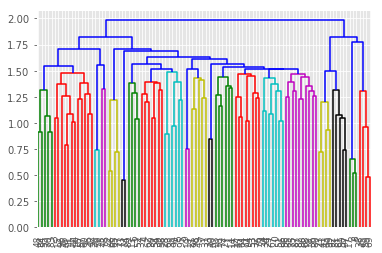

In [17]:
from scipy.cluster.hierarchy import dendrogram
dendro = dendrogram(link, color_threshold=1.5, leaf_font_size=9)
plt.show()

Change the labels on the data to be the titles of the articles

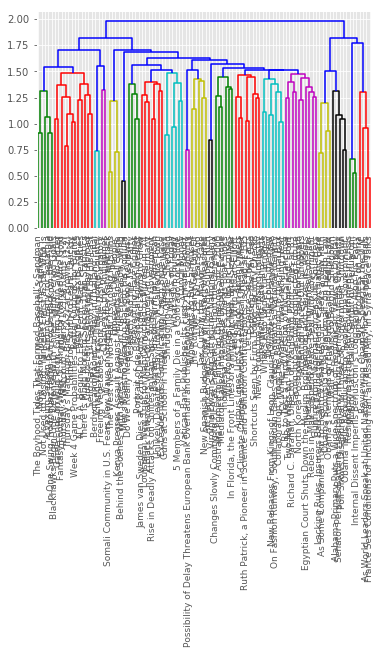

In [18]:
dendro = dendrogram(link, color_threshold=1.5, leaf_font_size=9,
                    labels=small_df['headline'].values)

Label each point with the title and the section

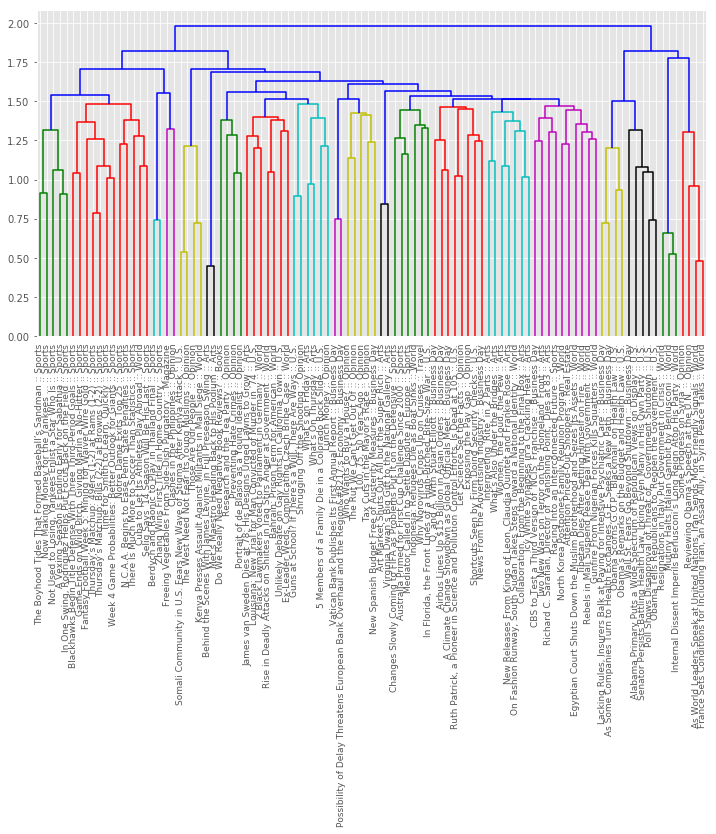

In [19]:
fig, ax = plt.subplots(1, figsize=(12, 6))

labels = (small_df['headline'] + ' :: ' + small_df['section_name']).values
dendro = dendrogram(link, color_threshold=1.5, leaf_font_size=9,
                    labels=labels)

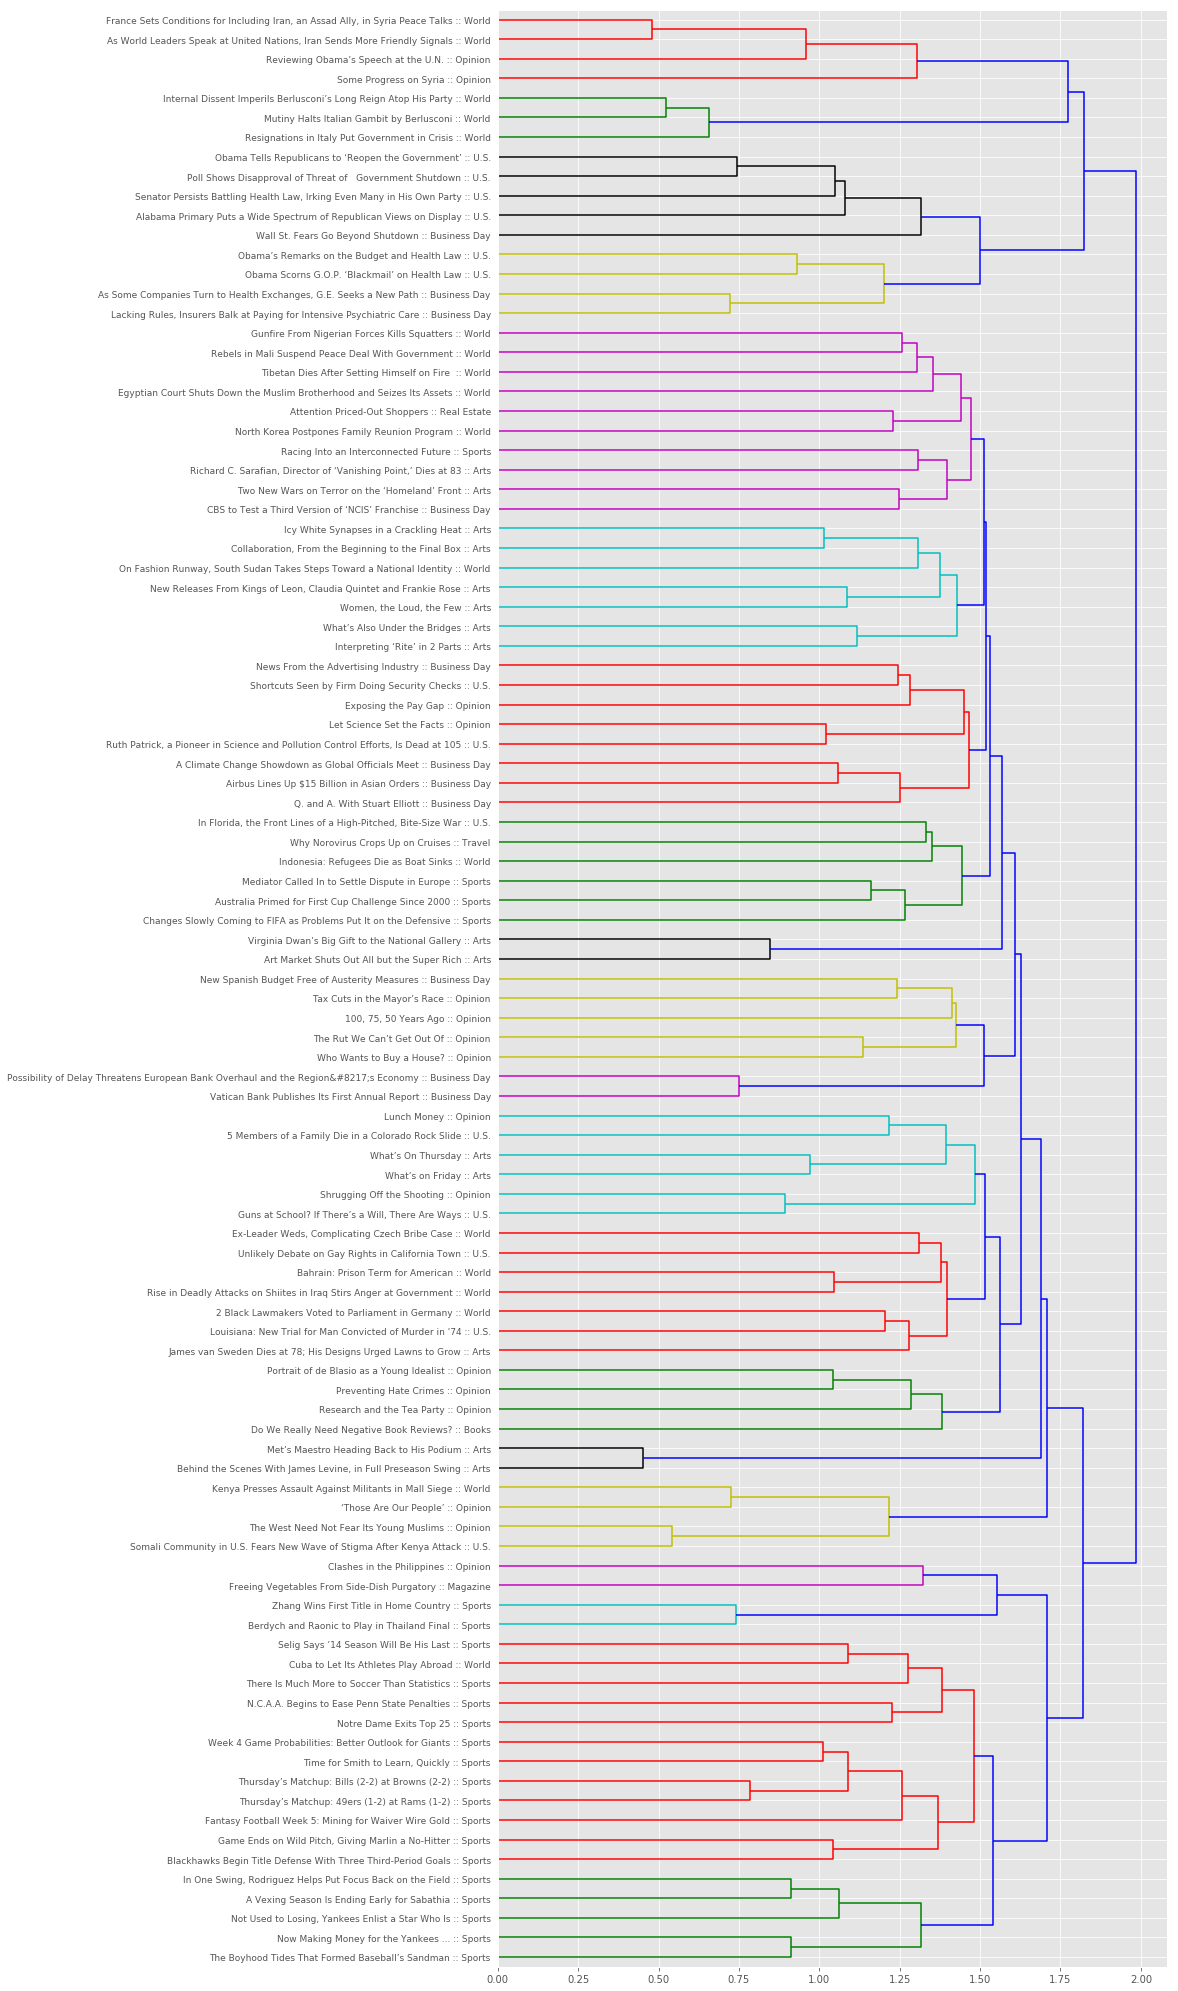

In [20]:
fig, ax = plt.subplots(1, figsize=(12, 36))

labels = (small_df['headline'] + ' :: ' + small_df['section_name']).values
dendro = dendrogram(link, color_threshold=1.5, leaf_font_size=9,
                    labels=labels, orientation='right')

Form flat clusters from linakge matrix by setting threshold

In [21]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(link, t=1.14)

df_res = pd.DataFrame({'section_name':small_df['section_name'],'clusters':clusters})
#print df_res
df_res['count'] = 1
print(df_res[['section_name','count']].groupby(['section_name']).sum())
print(df_res[['clusters','count']].groupby(['clusters']).sum())
print(df_res[['clusters','section_name','count']].groupby(['clusters','section_name']).sum())

              count
section_name       
Arts             15
Books             1
Business Day     11
Magazine          1
Opinion          16
Real Estate       1
Sports           22
Travel            1
U.S.             14
World            18
          count
clusters       
1             5
2             7
3             5
4             4
5            63
6            16
                       count
clusters section_name       
1        Sports            5
2        Sports            7
3        Sports            4
         World             1
4        Magazine          1
         Opinion           1
         Sports            2
5        Arts             15
         Books             1
         Business Day      8
         Opinion          13
         Real Estate       1
         Sports            4
         Travel            1
         U.S.              8
         World            12
6        Business Day      3
         Opinion           2
         U.S.              6
         World         

Explore different clusters on a per section basis

In [22]:
def plot_dendrogram_by_categorty(articles_df, category, n_articles=20):
    mask = articles_df['section_name'] == category
    cat_df = articles_df[mask].sample(n=n_articles)
    
    vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
    cat_X = vectorizer.fit_transform(cat_df['content'])
    distxy = squareform(pdist(cat_X.todense(), metric='cosine'))
    fig, ax = plt.subplots(1, figsize=(6, 6))
    
    labels = cat_df['headline'].values
    # labels = (cat_df['headline'] + ' :: ' + cat_df['subsection_name']).values
    
    dendro = dendrogram(linkage(distxy, method='complete'),
                        color_threshold=4,
                        leaf_font_size=8,
                        labels=labels,
                        orientation='right')
    ax.set_title(category)

/Users/xinning.w/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  del sys.path[0]


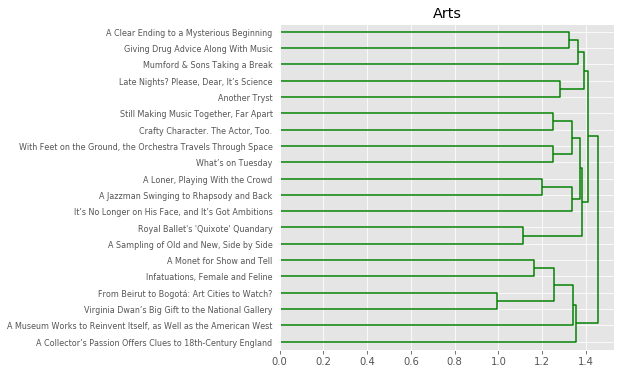

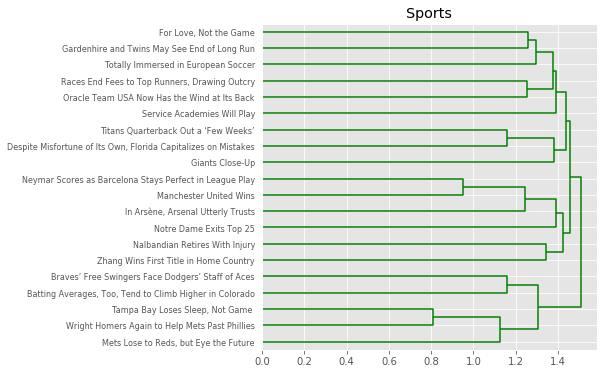

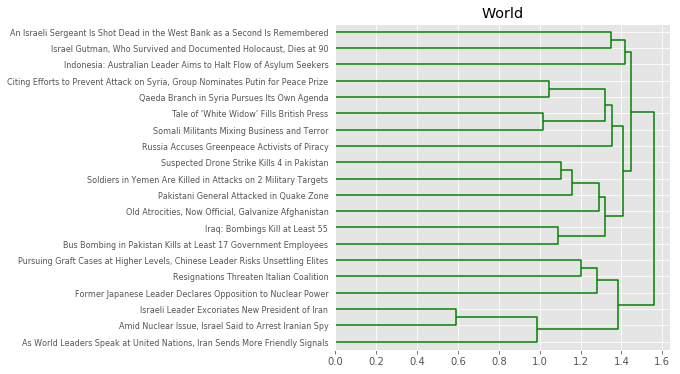

In [23]:
for category in ['Arts', 'Sports', 'World']:
    plot_dendrogram_by_categorty(articles_df, category)

Perform the same analysis as above and inspect the dendrogram with the words from the articles

/Users/xinning.w/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


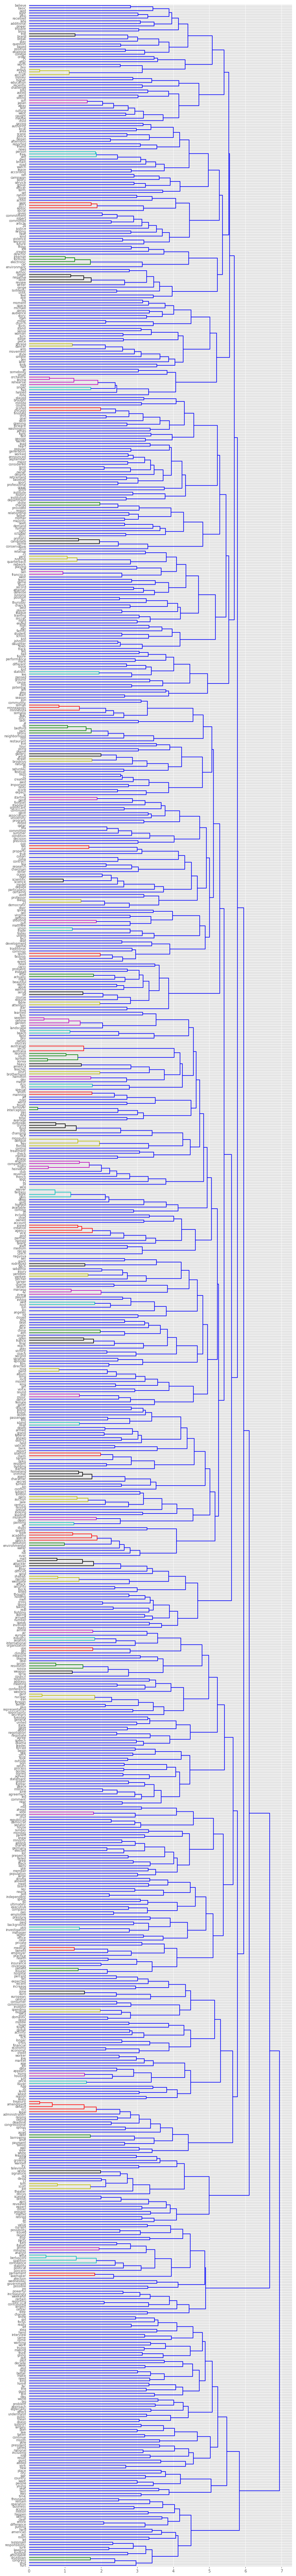

In [24]:
plt.figure(figsize=(12, 120))
distxy_words = squareform(pdist(small_X.T.todense(), metric='cosine'))
dendro = dendrogram(linkage(distxy_words, method='complete'),
                    color_threshold=2, leaf_font_size=8,
                    labels=small_features, orientation='right')